In [1]:
##Imports (Not all are used or required)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import time as TIME
from IPython.display import display,clear_output
import seaborn as sns
import pandas as pd
import math
sns.set()
%matplotlib inline

### Austin Czyzewski

# Title: Model of the Solar System Orbits

## Introduction:
This model simulates the orbit of the solar system using gravitational interactions from all of the major planets (sorry pluto but you're not a planet. This method uses multiple libraries to rely on date/time, positions of the planets at these times, and advanced integration methods (that typically run slower but more accurately).

### Goals:
* To model the solar system given different masses for the solar system's largest planet, Jupiter.
* Analyize different properties of the solar system that apply to Earth and patterns observed from the change in gravitational force. 
* Create a model that allows better visualization for how a solar system behaves with two large gravitational sources.

### Method:
* Use ODEINT to create a model of a system that allows for manipulation of mass of the planets.
* Use advanced modeling techniques to make sense of the data obtained from the ODEINT equations produced. 

## Applicable equations:
$$ F = ma $$

$$ F = \frac{-G M_1 M_2}{r^2} $$

$$ ma = \frac{-G M_1 M_2}{r^2} $$

Applying this in terms of a for loop goes to:

$$ M_1 a_1 = \frac{-G M_1 M_2}{r^2} $$

$$ a_1 = \frac{1}{M_1} \frac{-G M_1 M_2}{r^2} $$

Where $M_1$ Cancels on the top and the bottom giving:

$$ a_1 = \frac{-G M_2}{r^2} $$

In a double for loop for i in... for j in... this becomes

$$ a[i] = \frac{-G M[j]}{r^2} $$

This gives the magnitude of acceleration. To get this is 3 dimensions, the unit vector of r must be found by multiplying a by $$\frac{r_{1x}-r_{2x}}{r_{total}}$$ to give $a_x$

### Setting up the data:
To do so, I am going to use a library called skyfield. This is not built into python and must be installed. The documentation for this library can be found at [Skyfield's website](http://rhodesmill.org/skyfield/). The library utilizes it's own internal data and time data. The date and time that I am going to use as the base time and date is November 22nd at 3:00 PM.

In [2]:
from skyfield.api import load #Library that holds solar system postion and velocity data
Title = ['X', 'Y','Z', 'X_Vel','Y_Vel','Z_Vel','Mass','Radius'] #Masses/Radii from Wikipedia
Mercury = [(0),(0),(0),(0),(0),(0),(3.3011 * 10**23),2439] 
Venus = [(0),(0),(0),(0),(0),(0),(4.8675 * 10**24),6052]
Earth = [(0),(0),(0),(0),(0),(0),(5.97237 * 10**24),6378]
Mars = [(0),(0),(0),(0),(0),(0),(6.4171 * 10**23),3396]      #Setting up initial lists to hold positions & velocities
Jupiter = [(0),(0),(0),(0),(0),(0),(1.8982 * 10**27),71492]   #Mass and radius were input manually
Saturn = [(0),(0),(0),(0),(0),(0),(5.6834 * 10**26),60268]
Uranus = [(0),(0),(0),(0),(0),(0),(8.681 * 10**25),25559]
Neptune = [(0),(0),(0),(0),(0),(0),(1.0243 * 10**26),24764]
Sun = [(0),(0),(0),(0),(0),(0),(1.9855 * 10**30),695700]
Labels = ['Sun','Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
SS = pd.DataFrame([Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune],columns=Title,index=Labels)
# Loading in locations from skyfield
planets = load('de421.bsp')
#c = planets[0] #c for center of solar system
merc = planets[1]
ven = planets[2]
earth = planets[3]
mars = planets[4]
jup = planets[5]
sat = planets[6]
uran = planets[7]
nept = planets[8]
sun = planets[10]
ts = load.timescale() #Loading in timescale from skyfield
t = ts.utc(2017,11,22,15,0,0) #Loading in the date 11/22/2017 at 3:00 PM
objects = [sun,merc,ven,earth,mars,jup,sat,uran,nept]
objects_vel = [sun,merc,ven,earth,mars,jup,sat,uran,nept]
for i in range(len(objects)):
    objects[i] = objects[i].at(t).position.km #obtaining the position in km from skyfield
    objects_vel[i] = objects_vel[i].at(t).velocity.km_per_s #obtaining the velocity in km per s from skyfield
    SS.X.iloc[i] = objects[i][0] #storing x position of each celestial body
    SS.Y.iloc[i] = objects[i][1] #storing y position of each celestial body
    SS.Z.iloc[i] = objects[i][2] #storing z position of each celestial body
    SS.X_Vel.iloc[i] = objects_vel[i][0] #storing x velocity of each celestial body
    SS.Y_Vel.iloc[i] = objects_vel[i][1] #storing y velocity of each celestial body
    SS.Z_Vel.iloc[i] = objects_vel[i][2] #storing z velocity of each celestial body
SS

[#################################] 100% deltat.preds
/Users/AustinsiCloud/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,X,Y,Z,X_Vel,Y_Vel,Z_Vel,Mass,Radius
Sun,3.032032e+05,8.210314e+05,3.354802e+05,-0.009581,0.008303,0.003850,1.985500e+30,695700
Mercury,5.198463e+07,-2.084828e+07,-1.659753e+07,12.762409,40.762824,20.450552,3.301100e+23,2439
Venus,-9.035412e+07,-5.479992e+07,-1.895482e+07,18.778706,-26.520249,-13.121359,4.867500e+24,6052
Earth,7.359277e+07,1.185200e+08,5.135801e+07,-26.359391,13.464610,5.837320,5.972370e+24,6378
Mars,-2.467581e+08,1.346241e+07,1.280303e+07,-0.724683,-20.095420,-9.197933,6.417100e+23,3396
Jupiter,-6.632950e+08,-4.372900e+08,-1.712962e+08,7.393500,-9.166680,-4.109040,1.898200e+27,71492
Saturn,-2.388990e+07,-1.390876e+09,-5.734762e+08,9.127837,-0.026029,-0.403764,5.683400e+26,60268
Uranus,2.662006e+09,1.237702e+09,5.044297e+08,-3.104953,5.268262,2.351268,8.681000e+25,25559
Neptune,4.285492e+09,-1.166965e+09,-5.843387e+08,1.545089,4.857738,1.949832,1.024300e+26,24764


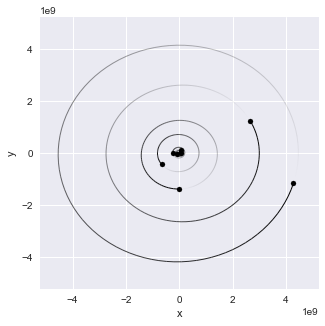

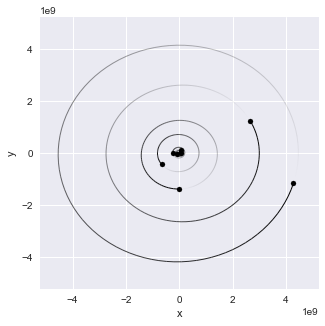

In [3]:
import rebound
sim = rebound.Simulation()
for i in range(9):
    sim.add(m=SS.Mass.iloc[i],x=SS.X.iloc[i],
            y=SS.Y.iloc[i],z=SS.Z.iloc[i],
            vx=SS.X_Vel.iloc[i],vy=SS.Y_Vel.iloc[i],
            vz=SS.Z_Vel.iloc[i],r=SS.Radius.iloc[i])
sim.G = 6.674*10**-20
rebound.OrbitPlot(sim)

### Plotting the solar system:

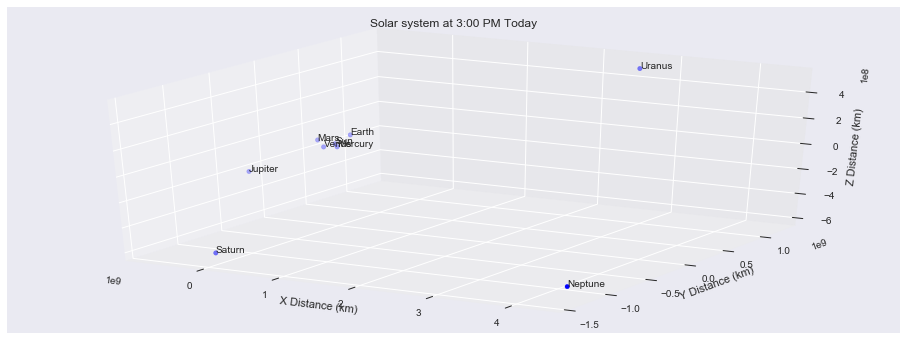

In [4]:
names = ['Sun','Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
m = SS.Mass
x = SS.X
y = SS.Y
z = SS.Z
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x,y,z,c = 'b', marker = 'o')
N = len(m)
for i in range(N):     #Axes names for each planet
    ax.text(x[i],y[i],z[i],names[i])
ax.set_xlabel('X Distance (km)')
ax.set_ylabel('Y Distance (km)')
ax.set_zlabel('Z Distance (km)')
plt.title('Solar system at 3:00 PM Today')

### Modeling the motion:

In [5]:
sim.dt = 86400   #Timestep for the simulation
Noutputs = 10000  #How many data points I want to store
year = 86400*365.25
howmanyyears = 170 #How many earth years I want the simulation to run.
times = np.linspace(0.,year*howmanyyears, Noutputs)
x = np.zeros((9,Noutputs)) 
y = np.zeros((9,Noutputs))
z = np.zeros((9,Noutputs))
sim.move_to_com()        # Moving the reference point to the center of momentum
ps = sim.particles   # Turns the objects into vector's holding quantities that can be updated during integration
for j in range(9):
    for i,time in enumerate(times):
        sim.integrate(time)  # Do the integrating
        x[j][i] = ps[j].x  #Storing the data
        y[j][i] = ps[j].y
        z[j][i] = ps[j].z

In [6]:
#ovito setup
#number of particles
#Comment Line
#Particle name - xpos - ypos - zpos
#don't include hyphens
coordinates = []
for i in range(len(x[1])):
    #coordinates.append(len(x))
    #coordinates.append("XYZ")
    for j in range(len(x)):
        coordinates.append([x[j][i],y[j][i],z[j][i]])
str(coordinates[0][2])

'335900.191453'

In [7]:
numbers = np.arange(0,90000,9)
from ipywidgets import FloatProgress
from IPython.display import display

In [9]:
### EXPORTING DATA TO TRY TO VISUALIZE IN OVITO///SOME BUGS (related to specific Data writing used)
'''
file = open("Data_4","x")
file.truncate()
#file.write(str(9))
#file.write("\n")
for i in range(len(coordinates)):
    for j in range(10000):
        if i == numbers[j]:
            file.write(str(9))
            file.write("\n")
            file.write("XYZ")
            file.write("\n")
            #continue
    file.write(str(coordinates[i][0]))
    file.write(" ")
    file.write(str(coordinates[i][1]))
    file.write(" ")
    file.write(str(coordinates[i][2]))
    file.write("\n")
    print(i/len(coordinates))
    clear_output(True)
file.close()
'''

'\nfile = open("Data_4","x")\nfile.truncate()\n#file.write(str(9))\n#file.write("\n")\nfor i in range(len(coordinates)):\n    for j in range(10000):\n        if i == numbers[j]:\n            file.write(str(9))\n            file.write("\n")\n            file.write("XYZ")\n            file.write("\n")\n            #continue\n    file.write(str(coordinates[i][0]))\n    file.write(" ")\n    file.write(str(coordinates[i][1]))\n    file.write(" ")\n    file.write(str(coordinates[i][2]))\n    file.write("\n")\n    print(i/len(coordinates))\n    clear_output(True)\nfile.close()\n'

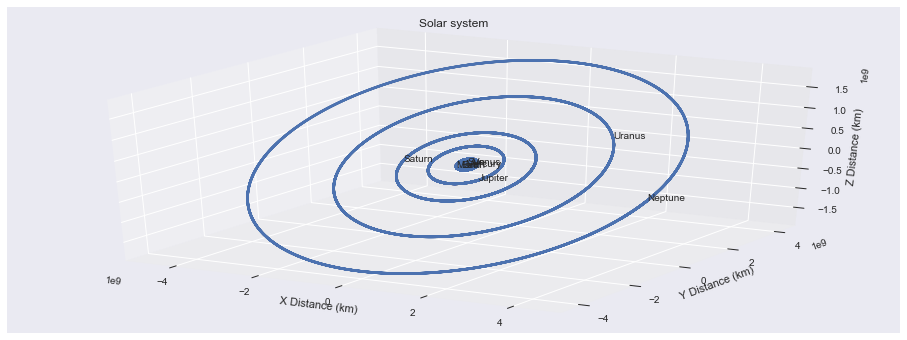

In [10]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x,y,z, marker = '.')
for i in range(N):
    ax.text(x[i][-1],y[i][-1],z[i][-1],names[i])
ax.set_xlabel('X Distance (km)')
ax.set_ylabel('Y Distance (km)')
ax.set_zlabel('Z Distance (km)')
plt.title("Solar system")

## Now let's change the mass of Jupiter

In [11]:
#Defining a function to make changing the mass nice
def changejupitermass(SS): #newmass is in solar masses masses
    newmass = float(input('New mass of jupiter in solar masses  ')) #Allowing any input of Mass
    Msun = 1.9855 * 10**30
    NewSS = SS
    NewSS.Mass.iloc[5] = newmass*Msun
    
    sim1 = rebound.Simulation()
    for i in range(9):
        sim1.add(m=NewSS.Mass.iloc[i],x=NewSS.X.iloc[i],y=NewSS.Y.iloc[i],z=NewSS.Z.iloc[i],vx=NewSS.X_Vel.iloc[i],vy=NewSS.Y_Vel.iloc[i],vz=NewSS.Z_Vel.iloc[i])
    sim1.G = 6.674*10**-20
    sim1.dt = 86400
    Noutputs = 10000
    year = 86400*365.25
    howmanyyears = float(input('How many Earth Years to run simulation?  '))
    times = np.linspace(0.,year*howmanyyears, Noutputs)
    x = np.zeros((9,Noutputs))
    y = np.zeros((9,Noutputs))
    z = np.zeros((9,Noutputs))
    sim1.move_to_com() 
    ps1 = sim1.particles
    for j in range(9):
        for i,time in enumerate(times):
            sim1.integrate(time)
            x[j][i] = ps1[j].x
            y[j][i] = ps1[j].y
            z[j][i] = ps1[j].z
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111,projection = '3d')
    ax.scatter(x,y,z, marker = '.')
    #for i in range(N):
    #    ax.text(x[i][-1],y[i][-1],z[i][-1],names[i])
    ax.set_xlabel('X Distance (km)')
    ax.set_ylabel('Y Distance (km)')
    ax.set_zlabel('Z Distance (km)')
    ax.set_xlim(-1*10**8,1*10**8)
    ax.set_ylim(-1*10**8,1*10**8)
    plt.title("Solar system")

New mass of jupiter in solar masses  .08


/Users/AustinsiCloud/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


How many Earth Years to run simulation?  100


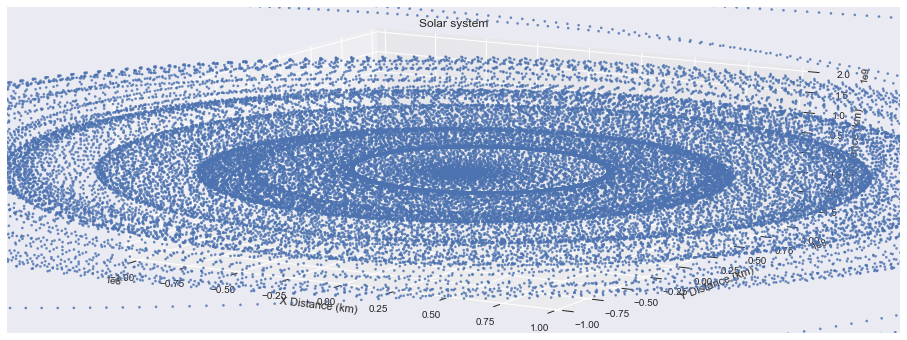

In [13]:
changejupitermass(SS)